In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.drop(columns=['cp','trtbps','restecg'],inplace=True)

In [6]:
df

,age,sex,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,233,1,150,0,2.3,0,0,1,1
1,37,1,250,0,187,0,3.5,0,0,2,1
2,41,0,204,0,172,0,1.4,2,0,2,1
3,56,1,236,0,178,0,0.8,2,0,2,1
4,57,0,354,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,241,0,123,1,0.2,1,0,3,0
299,45,1,264,0,132,0,1.2,1,0,3,0
300,68,1,193,1,141,0,3.4,1,2,3,0
301,57,1,131,0,115,1,1.2,1,1,3,0


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [12]:
df=df.sample(250)

In [18]:
# considering first 60 records are trainnig data 
df_train = df.iloc[:100,:].sample(10)

# considering next 20 record after 60  are validation
df_val = df.iloc[110:200,:].sample(5)

# considering next 20 record after 60  are testing data
df_test = df.iloc[80:,:].sample(5)

In [20]:
# validation data and labels from validation data 
X_val = df_val.iloc[:,0:9].values
y_val= df_val.iloc[:,-1].values

In [21]:
X_val

array([[ 42. ,   1. , 315. ,   0. , 125. ,   1. ,   1.8,   1. ,   0. ],
       [ 60. ,   1. , 258. ,   0. , 141. ,   1. ,   2.8,   1. ,   1. ],
       [ 57. ,   1. , 335. ,   0. , 143. ,   1. ,   3. ,   1. ,   1. ],
       [ 54. ,   0. , 214. ,   0. , 158. ,   0. ,   1.6,   1. ,   0. ],
       [ 40. ,   1. , 199. ,   0. , 178. ,   1. ,   1.4,   2. ,   0. ]])

In [23]:
# train data labels from trian data 
X_train = df_train.iloc[:,0:9].values
y_train = df_train.iloc[:,-1].values

In [25]:
# test data and labels from test data 
X_test = df_test.iloc[:,0:9].values
y_test = df_test.iloc[:,-1].values

In [35]:
# our model that predicts plot and shows accuracy 
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=9)
    y_pred = clf.predict(X_val)
    print(accuracy_score(y_val,y_pred))

In [27]:
# Data for Tree 1 
# since we need to do shuffling every time for random selection of records in every tree

df_bag = df_train.sample(25,replace=True)

X = df_bag.iloc[:,0:9]
y = df_bag.iloc[:,-1]


In [29]:
# Creating our classifier
dt_bag1 = DecisionTreeClassifier()

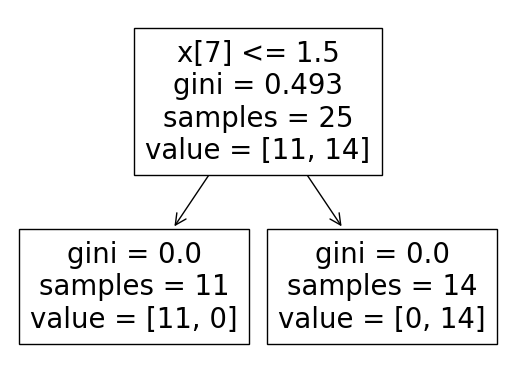

TypeError: 'int' object is not iterable

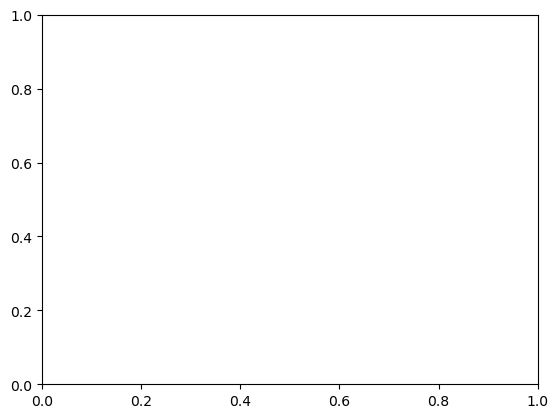

In [37]:
# runninig our model 
evaluate(dt_bag1,X,y)